<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [1]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [2]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [3]:
X,y

(array([[-0.57221041,  0.50753463],
        [-0.69933168,  0.37714964],
        [ 0.78170626,  0.20812231],
        ...,
        [ 0.95430535, -0.31951868],
        [ 0.69875883, -0.36965037],
        [ 0.28544807, -0.74596313]]),
 array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 

In [4]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,-0.572210,0.507535,1
1,-0.699332,0.377150,1
2,0.781706,0.208122,1
3,0.552262,0.884007,0
4,-0.566733,0.515124,1


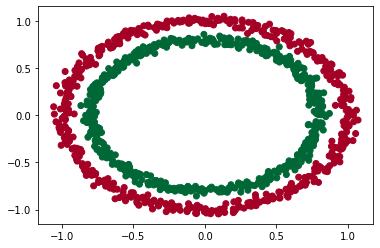

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [6]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0 -0.572210  0.507535
 1 -0.699332  0.377150
 2  0.781706  0.208122
 3  0.552262  0.884007
 4 -0.566733  0.515124, 0    1
 1    1
 2    1
 3    0
 4    1
 Name: Label, dtype: int64)

In [7]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [8]:


import tensorflow as tf

In [9]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 4.3073 - accuracy: 0.4700
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2638 - accuracy: 0.4613
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2007 - accuracy: 0.4538
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1646 - accuracy: 0.4475
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1223 - accuracy: 0.4437
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0892 - accuracy: 0.4425
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0808 - accuracy: 0.4387
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0153 - accuracy: 0.4338
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9502 - accuracy: 0.4288
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9287 - accuracy: 0.4263
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [10]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2193 - accuracy: 0.4625
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0014 - accuracy: 0.4625
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9349 - accuracy: 0.4663
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9000 - accuracy: 0.4675
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8018 - accuracy: 0.4712
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6668 - accuracy: 0.4737
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.4996 - accuracy: 0.4700
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 3.4294 - accuracy: 0.4688
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.3947 - accuracy: 0.4700
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.2734 - accuracy: 0.4725
Epoch 11/

In [11]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 3.4396 - accuracy: 0.4600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7705 - accuracy: 0.4512
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4375
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4300
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4450
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4850
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4487
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4387
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4650
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4512
Epoch 11/

In [13]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4900


[0.6961333751678467, 0.49000000953674316]

In [14]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [17]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5175
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5350
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5275
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5462
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5412
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5437
Epoch 8/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5512
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5525
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5525
Epoch 11/

In [18]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9950


[0.0659540593624115, 0.9950000047683716]